# COGS 118B - Final Project

# Battleship AI

## Group members

- Katelyn Vu
- Shruti Rao
- Jane Lee

# Abstract 
The goal of this project is to develop an AI-powered bot for the classic game Battleship, aimed at enhancing strategic decision-making and gameplay efficiency. The project addresses the issue of optimizing move selection in Battleship to create a challenging and engaging opponent for human players. The data utilized includes a series of game states, representing ship positions and the sequence of moves made by both the AI and human players. These data points are measured in terms of hit or miss outcomes, ship placements, and the number of turns taken to achieve victory. 

The core methodology involves training the AI to select optimal moves using reinforcement learning techniques, specifically Q-learning, to refine its strategy over time. The effectiveness of the AI is evaluated based on the number of turns it takes for the computer to win and its win rate against human opponents. The bot is tested against both simulated and real human opponents to ensure comprehensive evaluation. Performance and success are measured by the AI’s win rate, the average number of moves required to win, and its adaptability to different strategies. This project aims to create a robust and intelligent Battleship bot capable of competing at a high level, providing both challenging and engaging gameplay for users.

# Background

Battleship is a classic two-player strategy game that has captivated players of all ages for decades. The objective of the game is to strategically position your fleet of ships on a hidden grid and then guess the locations of your opponent's ships. Each player's grid is typically a 10x10 grid, and the fleet usually consists of ships of varying lengths. Players take turns calling out grid coordinates to attack their opponent's ships, and the first player to sink all of their opponent's ships wins the game. [[2]](https://shsulibraryguides.org/c.php)

The popularity of Battleship is not only due to its simplicity but also due to the deep strategic elements it incorporates. Players must balance between offensive and defensive tactics, making educated guesses based on limited information and adjusting their strategies as the game progresses. This blend of strategy, probability, and pattern recognition makes Battleship an ideal candidate for developing artificial intelligence (AI) [[1]](https://towardsdatascience.com/an-artificial-intelligence-learns-to-play-battleship-ebd2cf9adb01#0fbd) to play the game effectively.

There have been many previous researchers that have successfully programmed an AI model that can play an effective game of battleship. Alessio Tamburro was able to do so he trained a model using using Q-learning and a linear model with an epsilon-greedy policy.[[1]](https://towardsdatascience.com/an-artificial-intelligence-learns-to-play-battleship-ebd2cf9adb01#0fbd) This was tested on a 5x5 Battleship board over 100,000 episodes. Using stochastic gradient descent to minimize the Q function loss, initial tests with a fixed ship location confirmed the algorithm's effectiveness. For our problem, we want to look at a bigger board and implement reinforcement learning.

# Problem Statement

The problem we aim to solve is the development of an advanced AI bot that can effectively compete against human players in an enhanced version of the Battleship game. This version features a larger 15x15 grid, which introduces increased complexity and requires more sophisticated strategies. The core challenge is to create an AI that can accurately predict the positions of the opponent's fleet and execute strategic maneuvers to efficiently sink their ships while minimizing the risk to its own fleet. It can be expressed in mathematical terms by optimizing search algorithms and strategic decision-making processes, measured through specific metrics such as the number of games won and average number of moves taken, and consistently reproduced under standardized game rules for thorough testing and validation.

# Data

Our Battleship AI collects and utilizes game states represented as tuples 
(x,y), where x and y correspond to the coordinates of a selected square on the 15x15 game board. Each move results in a reward based on its outcome: positive rewards are given for hits, with even greater rewards for sinking a ship, while negative rewards are assigned for misses. This reward system guides the AI towards more effective strategies over time. When a hit is detected, the AI explores adjacent squares to locate and sink the ship, reinforcing the strategy of targeting nearby squares after a hit. If no hit is detected, the AI selects a random unchosen square, introducing an element of exploration to avoid getting stuck in limited areas and to gather more information about the board.

The data flow begins with the initialization of game states and corresponding Q-values, with the AI employing an epsilon-greedy strategy to balance exploration and exploitation. After each move, the AI updates its knowledge base by assigning rewards and updating the game state. The new state is added to the Q-table if not already present, and Q-values are refined based on the rewards received. This iterative process enables the AI to progressively improve its decision-making capabilities, learning from each game to enhance its performance through reinforcement learning.


# Proposed Solution

Our model employs dynamic programming to discover the optimal policy that maximizes rewards through multiple iterations of the game. Each state in the game is represented by the coordinates of a square on the 15x15 game board. The reward system assigns negative values for misses and positive values for hits, with the highest rewards given when a hit results in sinking a ship.

The transition to the next state varies based on the outcome of each action. If the shot results in a miss or a hit that sinks a ship, the AI can choose any square for the next move. However, if the shot results in a hit but the ship is not sunk, the next action focuses on a square within a one-step radius of the hit. This strategy ensures efficient targeting of partially revealed ships.

Throughout the game iterations, the AI explores different states and updates the value function based on the rewards received at each state. The AI continuously refines its strategy, converging towards a policy that yields the highest expected rewards for each move. To validate the model, we will analyze the game outcomes, specifically the frequency of wins and losses, to assess its effectiveness.

# Evaluation Metrics

This project focuses on the decision-making and efficiency of an AI bot in a Battleship game setting. Therefore, the evaluation metrics will concentrate on optimizing the strategy to maximize the bot’s success against its opponent. It is crucial to assess the winning rate (the number of games won by the bot), the number of moves needed (the approximate number of moves to reach the goal state), and the move success rate (the number of successful moves made by the bot per game). Each of these evaluation metrics can be represented mathematically as follows: 
Winning rate = number of games won/ number of games played.
    
    Example: The bot wins 4 games and played 5 total = 4/5
Moves needed = total number of moves needed to win in each game/ number of successful games. 
    
    Example: the total number of moves needed to win acoss 3 games is 10 = 10/3
Move success rate = number of successful moves/ number of moves in total.
    
    Example: the bot makes 5 successful moves and 7 total moves in the game = 5/7 

Each of these metrics represents key measures needed to assess the overall performance of the bot, such as efficiency, effectiveness, and accuracy. Understanding these metrics will help gauge the effectiveness of improvements made based on specific goals. [3]


# Results

## Subsection 1: Creating Battleship Game Environment: Random Bot
In our bottle ship AI environment, developed using Pygame with guidance from the Coding Cassowary YouTube channel, we have created a dynamic and engaging game setup that supports various player configurations. This environment features a 15x15 grid where ships are randomly placed at the beginning of each game. The ships vary in size and include one of size 5, one of size 4, two of size 3, and one of size 2. The game allows for three modes of play: two human players competing against each other, one human player versus a computer, and two computers playing against each other.
In terms of visuals and indicators, the ships are colored green initially to indicate their positions. When a ship is hit, a pink dot is placed on the grid to mark the hit, and when an attack misses, a blue dot is placed to indicate the miss. Once a ship is fully sunk, it is colored red to signify its destruction.

## Game Engine
The first algorithm that we tested out, was a random guessing algorithm. In our game engine we defined a randombot(). The randombot method in the Game class simulates the computer's turn by first checking if it is indeed the computer's turn to play. It generates a random index between 0 and 224, representing a potential target on the game board. The method ensures the selected index has not been previously targeted by either player by checking if it is marked as unexplored ("U"). If the index has already been targeted, it generates a new random index and repeats the check. Once an unexplored index is found, the method calls self.make_move(i), passing the selected index to the make_move method, which handles the game logic for recording the move, including updating hits, misses, sunk ships, and switching turns. This process allows the computer to make random valid moves during its turn, contributing to the automated gameplay.

In [2]:
import random
import numpy as np
import matplotlib.pyplot as plt

class Ship:
    def __init__(self, size):
        self.row = random.randrange(0,14)
        self.col = random.randrange(0,14)
        self.size = size
        self.orientation = random.choice(["h","v"])
        self.indexes = self.compute_indexes()

    def compute_indexes(self):
        start_index = self.row * 15 + self.col
        if self.orientation == "h":
            if start_index +self.size -1 >224:
                self.col = max(0,14 - (self.size -1))
                start_index = self.row *15 +self.col
            return[start_index + i for i in range(self.size)]
        elif self.orientation =="v":
            if self.row +self.size -1 >14:
                self.row = max(0,14 - (self.size -1))
                start_index = self.row * 15 + self.col
            return [start_index + i *15 for i in range(self.size)]
class Player:
    def __init__(self):
        self.ships = []
        self.search = ["U" for i in range(225)] # "U" for "unknown"
        self.place_ships(sizes = [5,4,3,3,2])
        list_of_lists = [ship.indexes for ship in self.ships]
        self.indexes = [index for sublist in list_of_lists for index in sublist]
    def place_ships(self,sizes):
        for size in sizes:
            placed = False
            while not placed:
                #create new ship
                ship = Ship(size)
                #is placememnt possible
                possible = True
                for i in ship.indexes:

                    if i>=224:
                        possible = False
                        break

                    #ships cannot behave like a snake
                    new_row = i //15
                    new_col = i % 15
                    if new_row != ship.row and new_col != ship.col:
                        possible = False
                        break
                    for other_ship in self.ships:
                        if i in other_ship.indexes:
                            possible = False
                            break
                    if possible:
                        self.ships.append(ship)
                        placed = True
    def show_ships(self):
        indexes = ['-'if i not in self.indexes else "X" for i in range(225)]
        for row in range(15):
            print(" ".join(indexes[(row-1)*15:row*15]))

class Game:
    def __init__(self, human1, human2):
        self.human1 = human1
        self.human2 = human2
        self.player1 = Player()
        self.player2 = Player()
        self.player1_turn = True
        self.computer_turn = True if not self.human1 else False
        self.over = False
        self.result = None
        self.n_shots = 0
        self.q_table = {}  # Q-table
        self.epsilon = 0.5 # Exploration rate
        self.alpha = 0.1  # Learning rate
        self.gamma = 0.9  # Discount factor
       
    def make_move(self, i):
        player = self.player1 if self.player1_turn else self.player2
        opponent = self.player2 if self.player1_turn else self.player1
        hit = False
        #set miss "M" or hit "H"
        if i in opponent.indexes:
            player.search[i] = "H"
            hit = True
            #check if ship sunk
            for ship in opponent.ships:
                sunk = True
                for i in ship.indexes:
                    if player.search[i] == "U":
                        sunk = False
                        break
                if sunk:
                    for i in ship.indexes:
                        player.search[i] = "S"
        else:
            player.search[i] = "M"

        #check for game over
        game_over = True
        for i in opponent.indexes:
            if 0 <= i < 225:
                if player.search[i] == "U":
                    game_over = False
            self.over = game_over
            self.result = 1 if self.player1_turn else 2

        #Change the active team 
        if not hit:
            self.player1_turn = not self.player1_turn
        # switch between human and computer
            if (self.human1 and not self.human2) or (not self.human1 and self.human2):
                self.computer_turn = not self.computer_turn

        #add number of shots 
        self.n_shots +=1
    
    def randombot(self):
        if self.computer_turn:
            i = random.randint(0, 224)
            while self.player1.search[i] != "U" and self.player2.search[i] != "U":
                i = random.randint(0, 224)
            self.make_move(i)
    
    def q_learning_epsilon(self):
        player = self.player1 if self.player1_turn else self.player2
        opponent = self.player2 if self.player1_turn else self.player1

        # Get current state as a tuple
        state = tuple(player.search)

        # Initialize Q-values for current state if not already present
        if state not in self.q_table:
            self.q_table[state] = [0] * 225

        # Epsilon-greedy action selection
        if random.random() < self.epsilon:
            action = random.choice([i for i, x in enumerate(player.search) if x == "U"])
        else:
            q_values = self.q_table[state]
            action = np.argmax(q_values)

        # Make the move and get the reward
        self.make_move(action)
        reward = 1 if player.search[action] == "H" else -1
        if player.search[action] == "S":
            reward += 4  # Bonus reward for sinking a ship

        # Update Q-value based on reward and next state
        new_state = tuple(player.search)
        if new_state not in self.q_table:
            self.q_table[new_state] = [0] * 225
        best_next_action = np.argmax(self.q_table[new_state])
        self.q_table[state][action] = (1 - self.alpha) * self.q_table[state][action] + self.alpha * (reward + self.gamma * self.q_table[new_state][best_next_action])
    
    def q_learning_policy(self):
        player = self.player1 if self.player1_turn else self.player2
        opponent = self.player2 if self.player1_turn else self.player1
        # Get current state as a tuple
        state = tuple(player.search)
        # Initialize Q-values for current state if not already present
        if state not in self.q_table:
            self.q_table[state] = [0] * 225
        # Explore nearby squares with a bonus
        nearby_bonus = 0.1  
        # Find all "H" squares on the board
        hit_squares = [i for i, x in enumerate(player.search) if x == "H"]
        if hit_squares:
                # Calculate distances only for valid unknown squares
            valid_unknown_squares = [i for i in [i for i, x in enumerate(player.search) if x == "U"] if 0 <= i < 225]  # Check for valid board positions
            distances = [min(abs(i - hit) % 15, abs(i // 15 - hit // 15)) for hit in hit_squares for i in valid_unknown_squares]

            q_values_with_bonus = [self.q_table[state][i] + nearby_bonus / (distances[i] + 1) for i in range(len(valid_unknown_squares))]
            best_action = np.argmax(q_values_with_bonus)
            action = valid_unknown_squares[best_action]
        else:
            # If no hits yet, use regular epsilon-greedy selection
            if random.random() < self.epsilon:
                action = random.choice([i for i, x in enumerate(player.search) if x == "U"])
            else:
                q_values = self.q_table[state]
                action = np.argmax(q_values)
        # Make the move and get the reward
        self.make_move(action)
        reward = 1 if player.search[action] == "H" else -1
        if player.search[action] == "S":
            reward += 4  # Bonus reward for sinking a ship
        new_state = tuple(player.search)
        if new_state not in self.q_table:
            self.q_table[new_state] = [0] * 225
        best_next_action = np.argmax(self.q_table[new_state])
        self.q_table[state][action] = (1 - self.alpha) * self.q_table[state][action] + self.alpha * (reward + self.gamma * self.q_table[new_state][best_next_action])

### Gameplay


Random_Bot gameplay: https://drive.google.com/file/d/1PjUdI8LnPtVDWWP9ut-b-aFPTZs2WsVE/view?usp=sharing

## Distribution of shots fired: Random
We investigated the performance of AI algorithms in Battleship by simulating 1000 games between AI agents. The number of shots fired per game was tracked. The best-case scenario, where all ships are sunk in one turn, requires only 17 shots. Interestingly, games between random AI agents resulted in a much higher range, typically around 600-700 shots. This suggests that random AI lacks strategic planning and takes many tries to locate and sink the opponent's ships. Further analysis could involve comparing other AI algorithms and exploring additional metrics to provide a more well-rounded evaluation of their effectiveness.

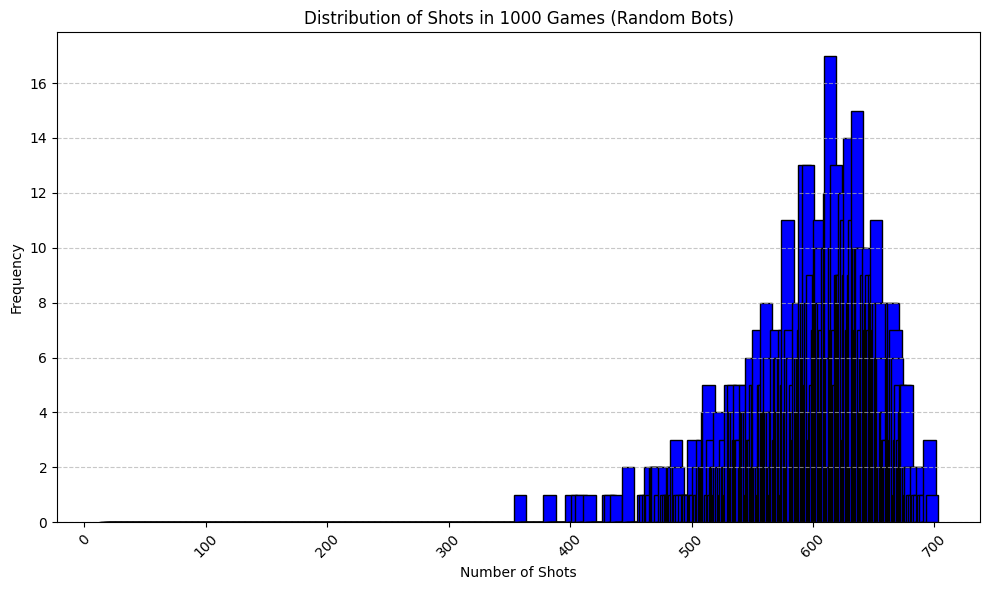

In [3]:
num_games = 1000
n_shots = []
wins1 = 0
wins2 = 0
for i in range(num_games):
    game = Game(human1=False, human2=False)
    while not game.over:
        if game.player1_turn or not game.player1_turn:
            game.randombot()
    n_shots.append(game.n_shots)
    if game.result == 1:
        wins1 += 1
    else: 
        wins2 += 1
count, bins = np.histogram(n_shots, bins=range(17, 700))  
plt.figure(figsize=(10, 6))  
plt.bar(bins[:-1], count, width=10, color='blue', edgecolor='black') 
plt.xlabel('Number of Shots')
plt.ylabel('Frequency')
plt.title('Distribution of Shots in 1000 Games (Random Bots)')
plt.grid(axis='y', linestyle='--', alpha=0.7)  
plt.xticks(rotation=45)  
plt.tight_layout()  
plt.show()

## Subsection 2: Trying Q Learning with Epsilon Greedy


Next, we implemented Q-Learning. Below is the code that we implemented into our Battleship game class. This code implements Q-learning with an epsilon-greedy policy to train a the AI agent. The agent represents the game state as the player's search board and uses a Q-table to store the value of different actions in each state. It balances exploration (trying new moves) and exploitation (taking the best known action) to learn from its experiences. The agent receives rewards for hitting ships and sinking them, and updates its Q-table based on these rewards to improve its strategy over time.

In [4]:
def q_learning_epsilon(self):
    player = self.player1 if self.player1_turn else self.player2
    opponent = self.player2 if self.player1_turn else self.player1

        # Get current state as a tuple
    state = tuple(player.search)

        # Initialize Q-values for current state if not already present
    if state not in self.q_table:
            self.q_table[state] = [0] * 225
    nearby_bonus = 0.1
        # Epsilon-greedy action selection
    if random.random() < self.epsilon:
        # Explore - choose random unknown position
        action = random.choice([i for i, x in enumerate(player.search) if x == "U"])
    else:
            # Exploit - choose action with highest Q-value
        q_values = self.q_table[state]
        action = np.argmax(q_values)

        # Make the move and get the reward
    self.make_move(action)
    reward = 1 if player.search[action] == "H" else -1
    if player.search[action] == "S":
        reward += 4  # Bonus reward for sinking a ship

        # Update Q-value based on reward and next state
    new_state = tuple(player.search)
    if new_state not in self.q_table:
        self.q_table[new_state] = [0] * 225
    best_next_action = np.argmax(self.q_table[new_state])
    self.q_table[state][action] = (1 - self.alpha) * self.q_table[state][action] + self.alpha * (reward + self.gamma * self.q_table[new_state][best_next_action])

### Gameplay
Q-Learning gameplay: https://drive.google.com/file/d/1e_ePqgiPO8VY5zla8F-tP9SksTnocncy/view?usp=sharing

## Distribution of Shots: Q-Learning Epsilon Greedy
Below we tested the effectiveness of the Q-learning model utilizing the same bragraph as above. Contradicting our prior hypothesis, the Q-learning model performed worse than the generic random model. 

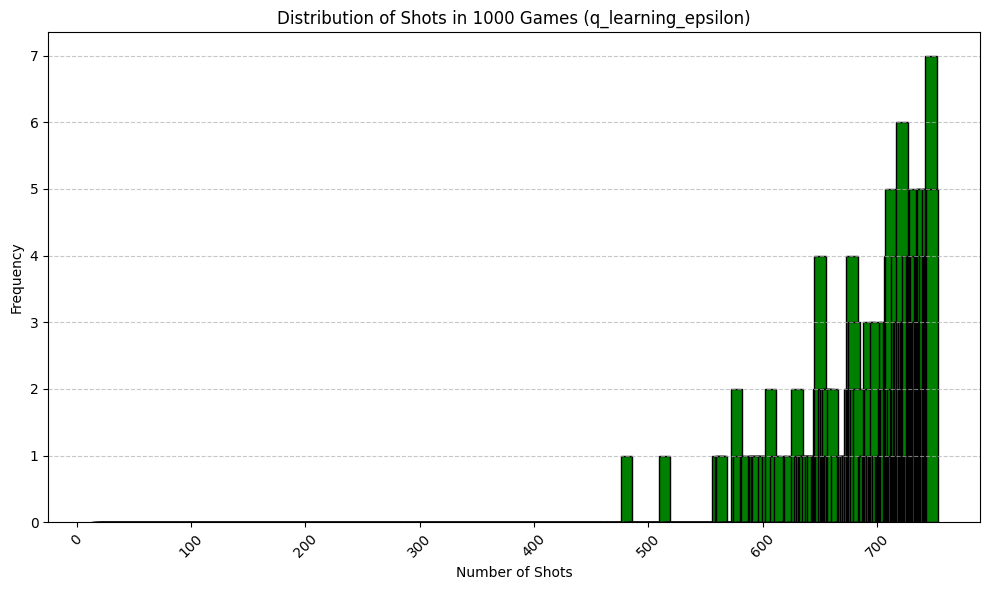

In [5]:
num_games = 1000
n_shots = []
wins1 = 0
wins2 = 0

for i in range(num_games):
    game = Game(human1=False, human2=False)
    while not game.over:
        if game.player1_turn:
            game.q_learning_epsilon()
        else:
            game.q_learning_epsilon()
    n_shots.append(game.n_shots)
    if game.result == 1:
        wins1 += 1
    else:
        wins2 += 1
count, bins = np.histogram(n_shots, bins=range(17, 750))  
plt.figure(figsize=(10, 6))  
plt.bar(bins[:-1], count, width=10, color='green', edgecolor='black')  
plt.xlabel('Number of Shots')
plt.ylabel('Frequency')
plt.title('Distribution of Shots in 1000 Games (q_learning_epsilon)')
plt.grid(axis='y', linestyle='--', alpha=0.7) 
plt.xticks(rotation=45)  
plt.tight_layout()  

plt.show()

## Subsection 3: Utilizing another policy with QLearning

 After looking at results from Q-Learning alone, we decided to implement a specific policy where the AI, upon hitting a ship, focuses its attacks on the surrounding squares (left, right, up, and down) by randomly choosing one of these neighboring locations for its next move. This approach aimed to exploit the knowledge gained from a successful hit to potentially sink the entire ship in a quicker succession. The results are promising, as evidenced by a significantly lower number of shots fired compared to the previous scenario where random AI agents played against each other. This suggests that the focused exploration around a confirmed hit aids the AI in strategically eliminating the ship and reduces the overall number of shots needed to win the game. 

In [ ]:
def q_learning_policy(self):
        player = self.player1 if self.player1_turn else self.player2
        opponent = self.player2 if self.player1_turn else self.player1
        # Get current state as a tuple
        state = tuple(player.search)
        # Initialize Q-values for current state if not already present
        if state not in self.q_table:
            self.q_table[state] = [0] * 225
        # Explore nearby squares with a bonus
        nearby_bonus = 0.1  
        # Find all "H" squares on the board
        hit_squares = [i for i, x in enumerate(player.search) if x == "H"]
        if hit_squares:
                # Calculate distances only for valid unknown squares
            valid_unknown_squares = [i for i in [i for i, x in enumerate(player.search) if x == "U"] if 0 <= i < 225]  # Check for valid board positions
            distances = [min(abs(i - hit) % 15, abs(i // 15 - hit // 15)) for hit in hit_squares for i in valid_unknown_squares]

            q_values_with_bonus = [self.q_table[state][i] + nearby_bonus / (distances[i] + 1) for i in range(len(valid_unknown_squares))]
            best_action = np.argmax(q_values_with_bonus)
            action = valid_unknown_squares[best_action]
        else:
            # If no hits yet, use regular epsilon-greedy selection
            if random.random() < self.epsilon:
                action = random.choice([i for i, x in enumerate(player.search) if x == "U"])
            else:
                q_values = self.q_table[state]
                action = np.argmax(q_values)
        # Make the move and get the reward
        self.make_move(action)
        reward = 1 if player.search[action] == "H" else -1
        if player.search[action] == "S":
            reward += 4  # Bonus reward for sinking a ship
        new_state = tuple(player.search)
        if new_state not in self.q_table:
            self.q_table[new_state] = [0] * 225
        best_next_action = np.argmax(self.q_table[new_state])
        self.q_table[state][action] = (1 - self.alpha) * self.q_table[state][action] + self.alpha * (reward + self.gamma * self.q_table[new_state][best_next_action])

### Gameplay
Policy model vs Policy model : https://drive.google.com/file/d/1nhBgYYwe-UY02SqdIB_QnMUFFrpDJLGd/view?usp=sharing


## Distribution of shots: Policy
The graph below illustrates a striking trend in the frequency of shots fired per game, particularly notable after the implementation of a certain policy. Before the policy came into effect, the average number of shots fired per game appeared around 600-700, fluctuating within this range. However, post-policy, there's a clear uptick in shot frequency, with games now seeing a notably higher number of shots on average, typically falling between 200 and 300 shots per game. This shift suggests a significant impact of the policy on the dynamics of gameplay, indicating potential changes in player strategies, game tempo, or perhaps even external factors influencing the sport's regulations.

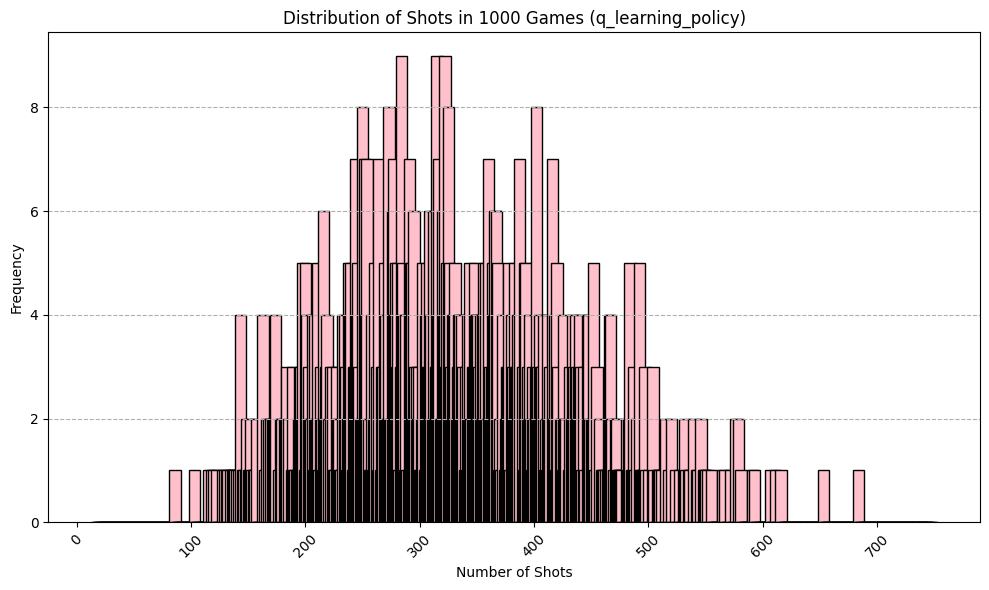

In [32]:
num_games = 1000
n_shots = []
wins1 = 0
wins2 = 0

for i in range(num_games):
    game = Game(human1=False, human2=False)
    while not game.over:
        if game.player1_turn:
            game.q_learning_policy()
        else:
            game.q_learning_policy()
    n_shots.append(game.n_shots)
    if game.result == 1:
        wins1 += 1
    else:
        wins2 += 1

count, bins = np.histogram(n_shots, bins=range(17, 750))  
plt.figure(figsize=(10, 6))  
plt.bar(bins[:-1], count, width=10, color='pink', edgecolor='black')  
plt.xlabel('Number of Shots')
plt.ylabel('Frequency')
plt.title('Distribution of Shots in 1000 Games (q_learning_policy)')
plt.grid(axis='y', linestyle='--') 
plt.xticks(rotation=45)  
plt.tight_layout()  

plt.show()

## Comparing algorithms
To compare the model, we ran a large number of games between these two strategies, the code aims to evaluate their relative performance. After the simulation, the number of wins for each strategy is tallied. The output then displays the count of wins for the two models. This comparison helps in understanding which strategy, random, Q-learning with epsilon-greedy, or Q-learning with a policy tends to perform better in the game environment.

randombot wins: 818
q_learning_epsilon wins 182


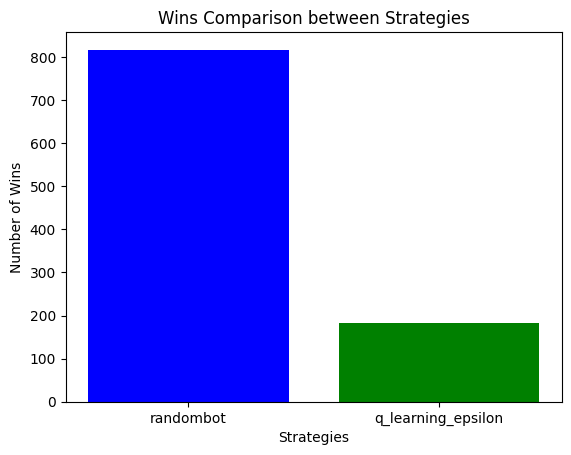

In [27]:
num_games = 1000
wins1 = 0
wins2 = 0

for i in range(num_games):
    game = Game(human1=False, human2=False)
    while not game.over:
        if game.player1_turn:
            game.randombot()
        else:
            game.q_learning_epsilon()
    if game.result == 1:
        wins1 += 1
    else:
        wins2 += 1
print("randombot wins:", wins1)
print("q_learning_epsilon wins", wins2)
strategies = ['randombot', 'q_learning_epsilon']
wins = [wins1, wins2]
plt.bar(strategies, wins, color=['blue', 'green'])
plt.xlabel('Strategies')
plt.ylabel('Number of Wins')
plt.title('Wins Comparison between Strategies')
plt.show()


randombot wins: 37
q_learning_policy wins 963


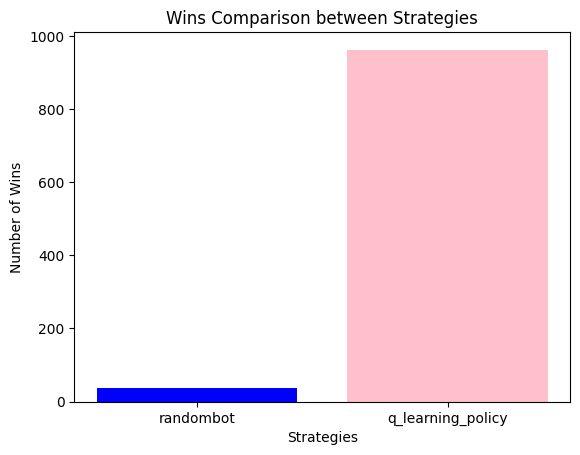

In [28]:
num_games = 1000
wins1 = 0
wins2 = 0


for i in range(num_games):
    game = Game(human1=False, human2=False)
    while not game.over:
        if game.player1_turn:
            game.randombot()
        else:
            game.q_learning_policy()
    if game.result == 1:
        wins1 += 1
    else:
        wins2 += 1
print("randombot wins:", wins1)
print("q_learning_policy wins", wins2)
strategies = ['randombot', 'q_learning_policy']
wins = [wins1, wins2]
plt.bar(strategies, wins, color=['blue', 'pink'])
plt.xlabel('Strategies')
plt.ylabel('Number of Wins')
plt.title('Wins Comparison between Strategies')
plt.show()

qlearning_policy wins: 978
q_learning_epsilon wins 22


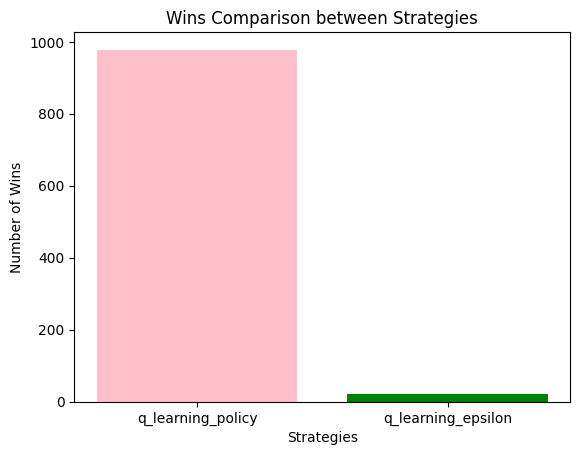

In [25]:
wins1 = 0
wins2 = 0
for i in range(num_games):
    game = Game(human1=False, human2=False)
    while not game.over:
        if game.player1_turn:
            game.q_learning_policy()
        else:
            game.q_learning_epsilon()
    if game.result == 1:
        wins1 += 1
    else:
        wins2 += 1
print("qlearning_policy wins:", wins1)
print("q_learning_epsilon wins", wins2)

strategies = ['q_learning_policy', 'q_learning_epsilon']
wins = [wins1, wins2]

plt.bar(strategies, wins, color=['pink', 'green'])
plt.xlabel('Strategies')
plt.ylabel('Number of Wins')
plt.title('Wins Comparison between Strategies')
plt.show()

# Discussion

### Interpreting the result

OK, you've given us quite a bit of tech informaiton above, now its time to tell us what to pay attention to in all that.  Think clearly about your results, decide on one main point and 2-4 secondary points you want us to understand. Highlight HOW your results support those points.  You probably want 2-5 sentences per point.

### Limitations

Are there any problems with the work?  For instance would more data change the nature of the problem? Would it be good to explore more hyperparams than you had time for?   

### Ethics & Privacy

This Project is based on a game environment  therefore it is important to address any ethics and privacy concerns revolving around the human player that is participating against the AI. SInce the AI bot is designed to play with the highest efficiency, it is important to consider the AI bot’s interaction with the human user. For example, if a child with little battleship game experience is playing against the AI designed to win every time, it will not be fair to the player. One solution to this is to create the bot so that it plays according to different difficulty levels, making it accessible to a variety of players both beginners and experts. 

It is equally important to prioritize the user's privacy and safety with any and all data that is collected about that user. For this reason it is important to carry transparency about what data is collected and how it will be collected, and if any data will be stored. If there is any need to share personal data, it should only be done after consensual authorization, taking these privacy issues into account, it will be easier to create a safe and trustworthy environment that will bring more online users. In most cases it is best to have a session based game setting where the user will remain anonymous to avoid any privacy concerns. [4]


### Conclusion

Reiterate your main point and in just a few sentences tell us how your results support it. Mention how this work would fit in the background/context of other work in this field if you can. Suggest directions for future work if you want to.

# Footnotes
<a name="tsuchinotet"></a>1.[^](#tsuchinote): Tamburro, A. (25 Apr 2020) An Artificial Intelligence Learns to Play Battleship. *Towards Data Science*. https://towardsdatascience.com/an-artificial-intelligence-learns-to-play-battleship-ebd2cf9adb01#0fbd<br><a name="shsulibrarynote"></a>2.[^](#shsulibrary): Sam Houston State University Library. (n.d.) Battleship Game Rules. *SHSU Library Guides*. https://shsulibraryguides.org/c.php?g=1162121&p=8578888#:~:text=Each%20player%20deploys%20his%20ships,ships%20are%20and%20sink%20them.<br>
3. AhmedTaha. (2023, November 3). Complete Guide to Machine Learning Evaluation Metrics. CloudLink, LLC. https://cloudlink.us/complete-guide-to-machine-learning-evaluation-metrics-2/ <br>4. An ethics checklist for data scientists. Deon. (n.d.). https://deon.drivendata.org/ <br>
<a name="youtubeplaylist"></a>5.[^](#youtubeplaylist): Computer Science Crash Course. (2023, November 3). Machine Learning Basics Playlist. *YouTube*. https://www.youtube.com/playlist?list=PLBLV84VG7Md8SgHlXuQXPMJLDvCaWVVQv <br>
